In [ ]:
# figure this out tomorrow!
using KagomeDSL
using LinearAlgebra
using CairoMakie

In [53]:
function plot(imbalance)
    fig = Figure()
    ax = Axis(fig[1, 1], title="Spinon Gap (imbalance $(imbalance))", xlabel="Energy(E)", ylabel="Density of States (DOS)")
    for n in 1:4
        B0 = imbalance * π / ((4n)^2 * (2√3)) / 2
        lat = KagomeDSL.DoubleKagome(1.0, 4n, 4n, (true, true); antiPBC=(true, false))
        H = KagomeDSL.Hmat(lat; B=B0)
        F = eigen(H)
        p = sortperm(F.values)
        evalues = F.values[p]
        @show evalues
        ns = (4n)^2 * 3
        energies, dos = calculate_dos(evalues; energy_range=(-4, 2), n_points=1000, sigma=0.1)
        lines!(ax, energies, dos, label="n = $n", linewidth=2)
    end
    axislegend(ax, position=:lt)
    fig
end

plot (generic function with 1 method)

evalues = [-3.4142135623731, -3.4142135623730967, -3.4142135623730927, -3.4142135623730905, -3.236067977499792, -3.2360679774997916, -3.2360679774997876, -3.2360679774997854, -2.000000000000004, -2.000000000000001, -1.9999999999999991, -1.9999999999999976, -1.414213562373098, -1.4142135623730943, -1.4142135623730938, -1.4142135623730927, -0.5857864376269065, -0.5857864376269045, -0.585786437626904, -0.5857864376269004, -9.89505444623994e-16, -4.959941397077638e-16, -6.76460562262225e-17, 7.294428828022443e-16, 1.2360679774997883, 1.2360679774997894, 1.2360679774997896, 1.2360679774997902, 1.4142135623730943, 1.4142135623730945, 1.4142135623730951, 1.4142135623730954, 1.9999999999999982, 1.9999999999999984, 1.999999999999999, 1.9999999999999991, 1.9999999999999991, 1.9999999999999993, 1.9999999999999993, 1.9999999999999996, 1.9999999999999998, 2.0, 2.0, 2.0000000000000004, 2.0000000000000004, 2.000000000000001, 2.000000000000001, 2.0000000000000013]
evalues = [-3.4436175892517653, -3.44

Legend()

In [52]:
function calculate_dos(eigenvalues; energy_range=(-4, 2), n_points=5000, sigma=0.04)
    energies = range(energy_range[1], energy_range[2], length=n_points)
    dos = zeros(n_points)
    for E in eigenvalues
        dos .+= exp.(-((energies .- E) .^ 2) ./ (2 * sigma^2))
    end
    return energies, dos ./ (length(eigenvalues) * sigma * sqrt(2 * pi))
end

calculate_dos (generic function with 1 method)

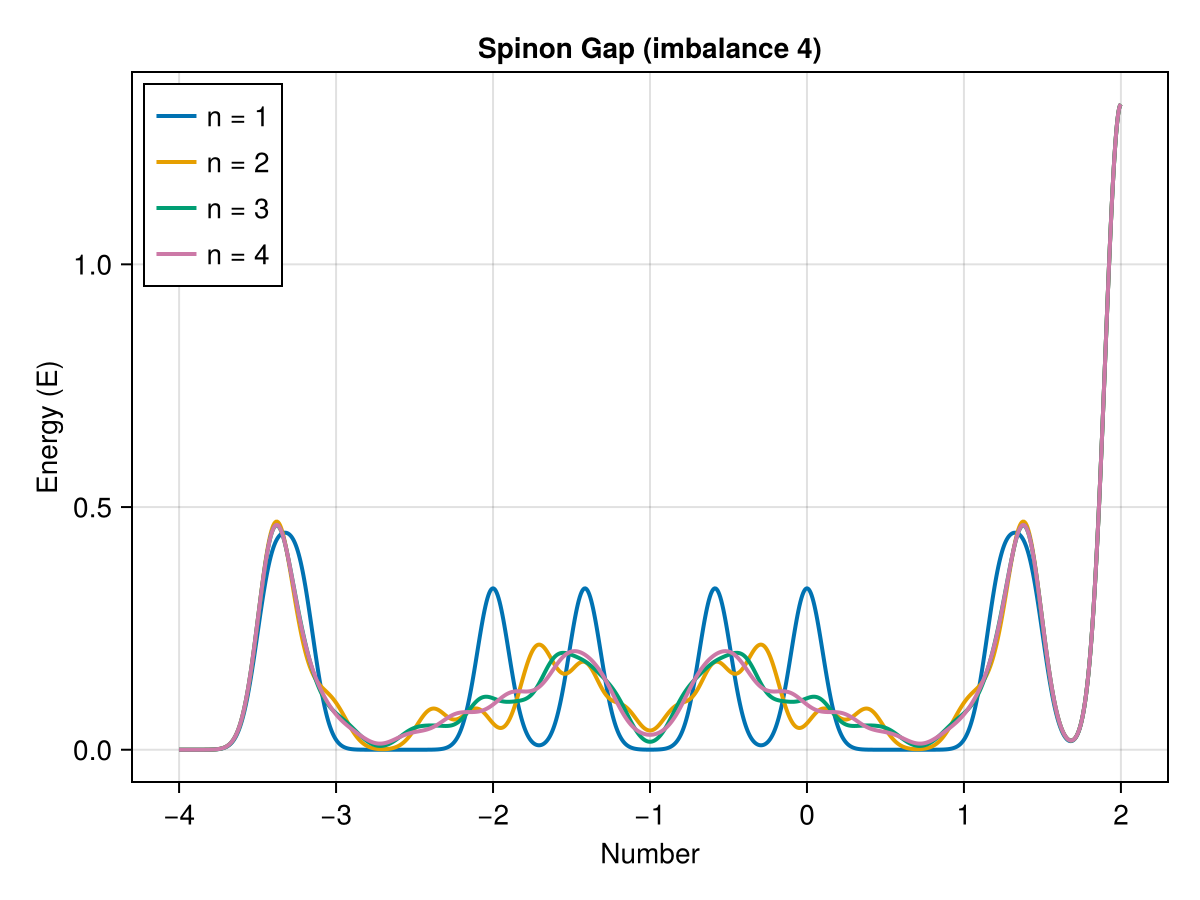

In [47]:
fig

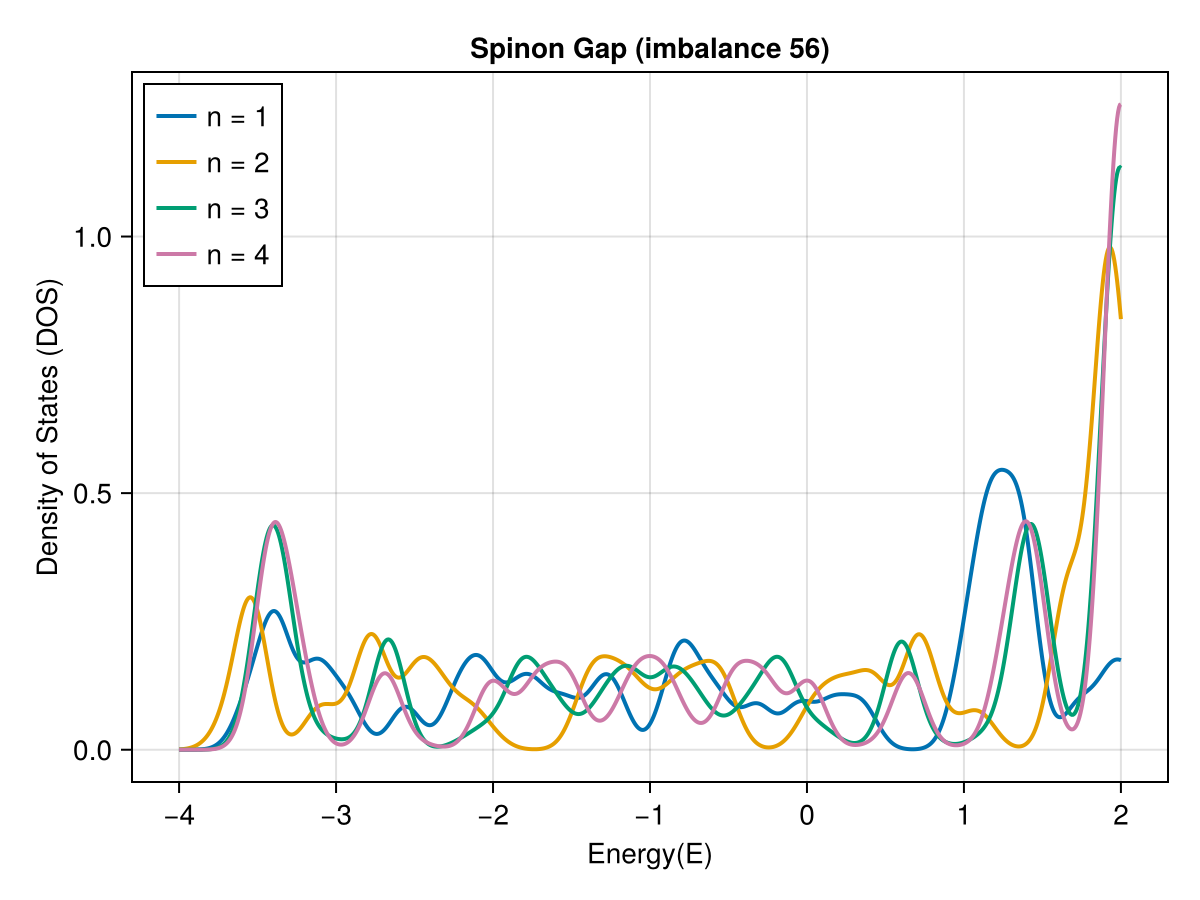

In [56]:
plot(56)